## This is the Submission of Data Wrangling Team Project - Group 1 - Part 1
### Topic: Inspecting, Cleaning and Re-structuring of the eCommerce1c Dataset for the Statistical Analysis and Modelling

In [1]:
## setting up - import the necessary packages ##
import os
#import cv2
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import missingno as missno
from matplotlib import rcParams
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from matplotlib import cm
#from pandas_profiling import ProfileReport
os.getcwd()

# Change directory # C:\Users\louis\My Python Coding Space\Advanced python Course Codes # "C:\Users\louis\M5 DW Code"
os.chdir('C:\\Users\\wooo_\\OneDrive\\Desktop\\SUTD Notes\\Data Wrangling with Programming\\Group Project\\Large Dataset (Group1)')

#os.getcwd()

### The original Dataset 

In [2]:
## Read the eCommerce Dataset

Df1 = pd.read_csv("eCommerceDataset1.csv", header=0) 

print(Df1.head())

   item_id    status  created_at  \
0   211131  complete    7/1/2016   
1   211133  canceled    7/1/2016   
2   324257  canceled  11/25/2016   
3   211134  canceled    7/1/2016   
4   473369  complete   5/19/2017   

                                                 sku  price_usd  qty_ordered  \
0                                  kreations_YI 06-L      11.63            1   
1  kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...       1.43            1   
2                                RS_Habshi Halwa Tin       1.61            1   
3                                 Ego_UP0017-999-MR0      14.62            1   
4                                          BT_BT-422       3.16            1   

  increment_id    category_name_1 sales_commission_code  adj_usd  \
0    100147443    Women's Fashion                    \N      0.0   
1    100147444  Beauty & Grooming                    \N      0.0   
2    100222998            Soghaat                    \N      0.0   
3    100147445    Women's Fash

C:\Users\wooo_\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Inspecting the dataset

In [3]:
print(Df1.head())

   item_id    status  created_at  \
0   211131  complete    7/1/2016   
1   211133  canceled    7/1/2016   
2   324257  canceled  11/25/2016   
3   211134  canceled    7/1/2016   
4   473369  complete   5/19/2017   

                                                 sku  price_usd  qty_ordered  \
0                                  kreations_YI 06-L      11.63            1   
1  kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...       1.43            1   
2                                RS_Habshi Halwa Tin       1.61            1   
3                                 Ego_UP0017-999-MR0      14.62            1   
4                                          BT_BT-422       3.16            1   

  increment_id    category_name_1 sales_commission_code  adj_usd  \
0    100147443    Women's Fashion                    \N      0.0   
1    100147444  Beauty & Grooming                    \N      0.0   
2    100222998            Soghaat                    \N      0.0   
3    100147445    Women's Fash

In [4]:
print(Df1.tail())

        item_id          status created_at                    sku  price_usd  \
584519   804621        canceled  3/27/2018    OTHPCB5AB351ED6A8F2      29.83   
584520   805750        canceled  3/27/2018    OTHPCB5AB351ECC7118       2.98   
584521   807010        canceled  3/27/2018    OTHPCB5AB351EEC46EC       2.98   
584522   808287  order_refunded  3/27/2018  MEFKAR5A7C138CE9EBD-L       6.21   
584523   814174        canceled  3/28/2018    OTHPCB5ABB207673754      11.93   

        qty_ordered increment_id category_name_1 sales_commission_code  \
584519            2    100496269          Others                   NaN   
584520            2    100497359          Others                   NaN   
584521            4    100498582          Others                   NaN   
584522            1    100499821   Men's Fashion                   NaN   
584523            5    100505460          Others                   NaN   

        adj_usd payment_method Working_Date B_Status  Year  Month  \
58451

In [5]:
## Check Df attributes ##
print(Df1.columns)
print("\n", Df1.shape)
print("\n", Df1.index)
print("\n", Df1.values)

Index(['item_id', 'status', 'created_at', 'sku', 'price_usd', 'qty_ordered',
       'increment_id', 'category_name_1', 'sales_commission_code', 'adj_usd',
       'payment_method', 'Working_Date', 'B_Status', 'Year', 'Month',
       'Customer_Since', 'M-Y', 'FY', 'Customer_ID'],
      dtype='object')

 (584524, 19)

 RangeIndex(start=0, stop=584524, step=1)

 [[211131 'complete' '7/1/2016' ... 'Jul-16' 'FY17' 1.0]
 [211133 'canceled' '7/1/2016' ... 'Jul-16' 'FY17' 2.0]
 [324257 'canceled' '11/25/2016' ... 'Nov-16' 'FY17' 2.0]
 ...
 [807010 'canceled' '3/27/2018' ... 'Mar-18' 'FY18' nan]
 [808287 'order_refunded' '3/27/2018' ... 'Mar-18' 'FY18' nan]
 [814174 'canceled' '3/28/2018' ... 'Mar-18' 'FY18' nan]]


# An overview of the dataframe 1, Df1
## Overall data looks very clean. But more in-depth cleaning is required:

In [6]:
print(Df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584524 entries, 0 to 584523
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  int64  
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price_usd              584524 non-null  float64
 5   qty_ordered            584524 non-null  int64  
 6   increment_id           584524 non-null  object 
 7   category_name_1        584360 non-null  object 
 8   sales_commission_code  447349 non-null  object 
 9   adj_usd                584524 non-null  float64
 10  payment_method         584524 non-null  object 
 11  Working_Date           584524 non-null  object 
 12  B_Status               584524 non-null  object 
 13  Year                   584524 non-null  int64  
 14  Month                  584524 non-nu

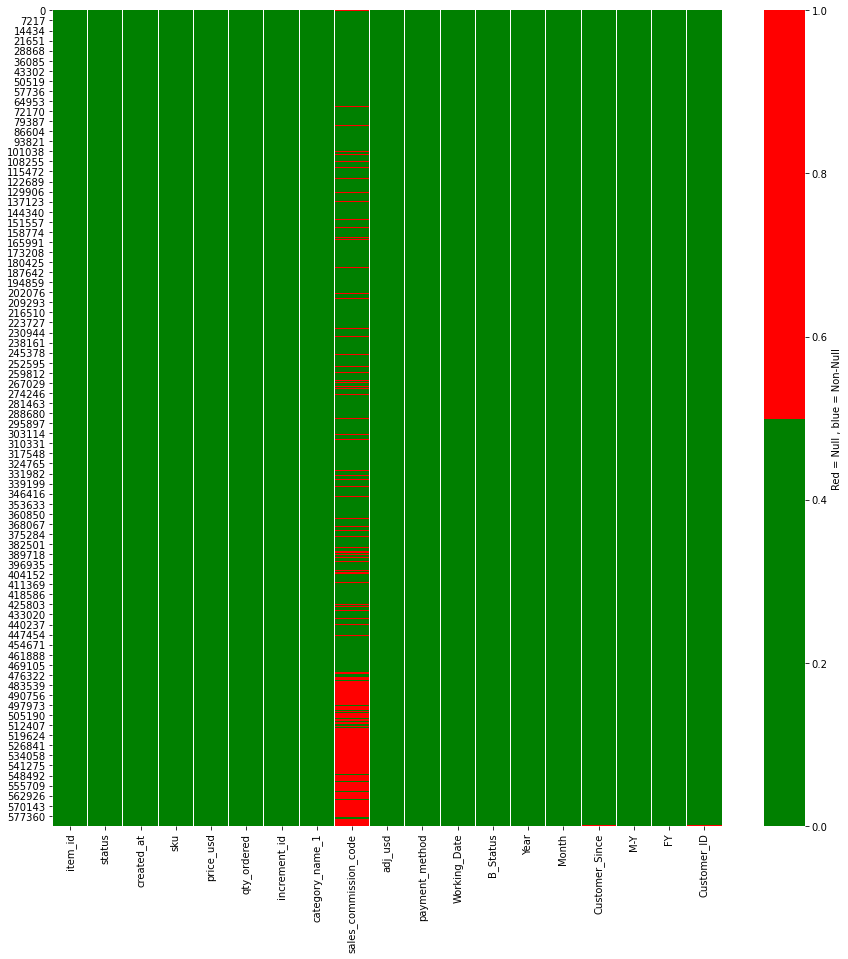

In [7]:
## An overview of the dataframe11
cols = Df1.columns[:]        # 
colours = ['green', 'red']      # specify the colours - red is missing. blue is not missing.

plt.subplots(figsize=(15,15))  # magnify the plot size to view the details

sb.heatmap(Df1[cols].isnull(), cmap=sb.color_palette(colours), cbar_kws={'label': 'Red = Null , blue = Non-Null', 'orientation': 'vertical'})
# plotting as heatmap for null values, with colormap following your specified colors, set cbar arguments
plt.xticks(rotation=90)
plt.show()

### Note: The category_name_1 and sales_commission_code were required more cleaning, many null data
### But sales_commission_code may not be useful for this analysis.

C:\Users\louis\anaconda3\lib\site-packages\missingno\missingno.py:265: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([int(n * len(df)) for n in ax1.get_yticks()], fontsize=fontsize)


<AxesSubplot:>

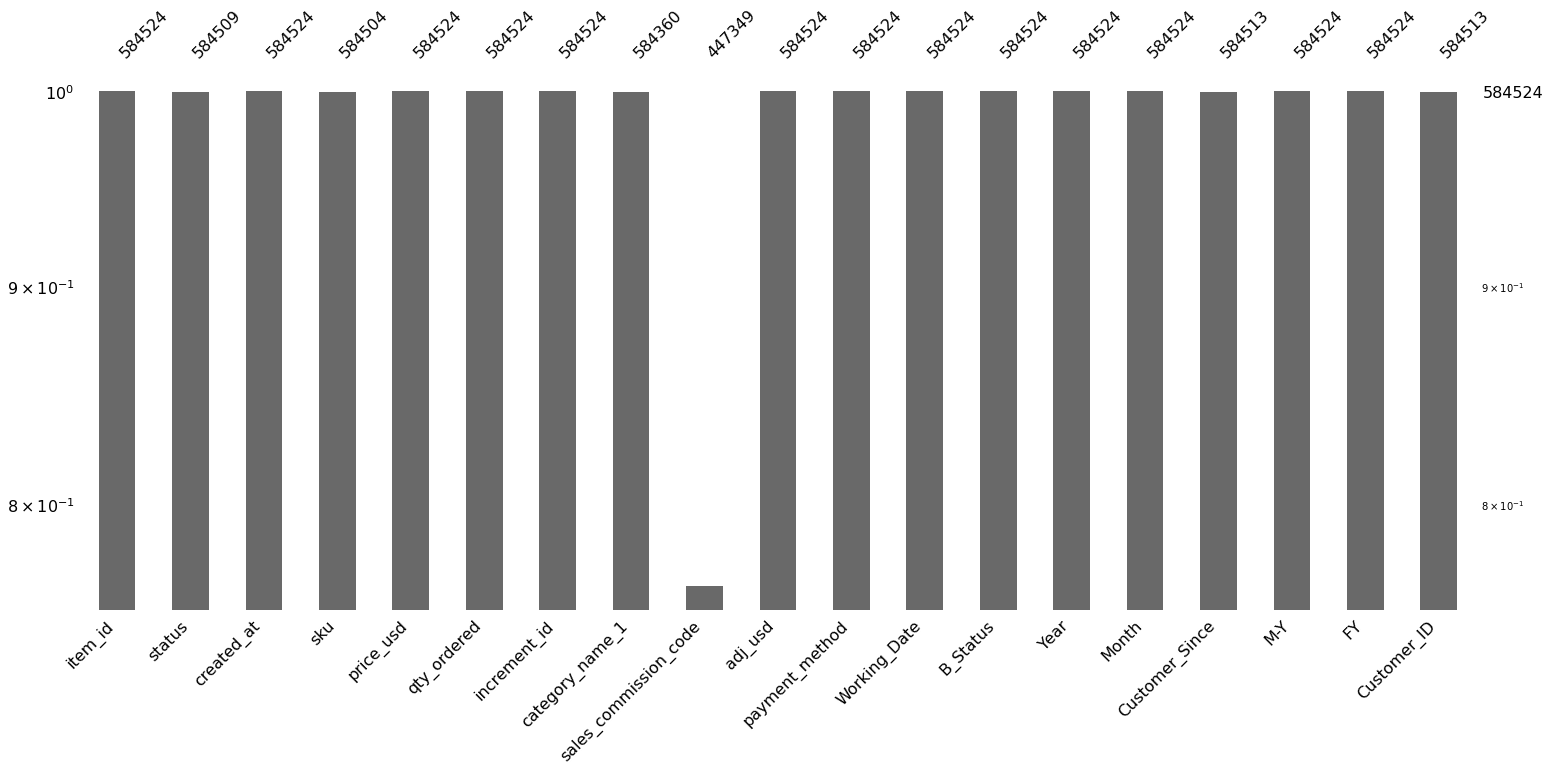

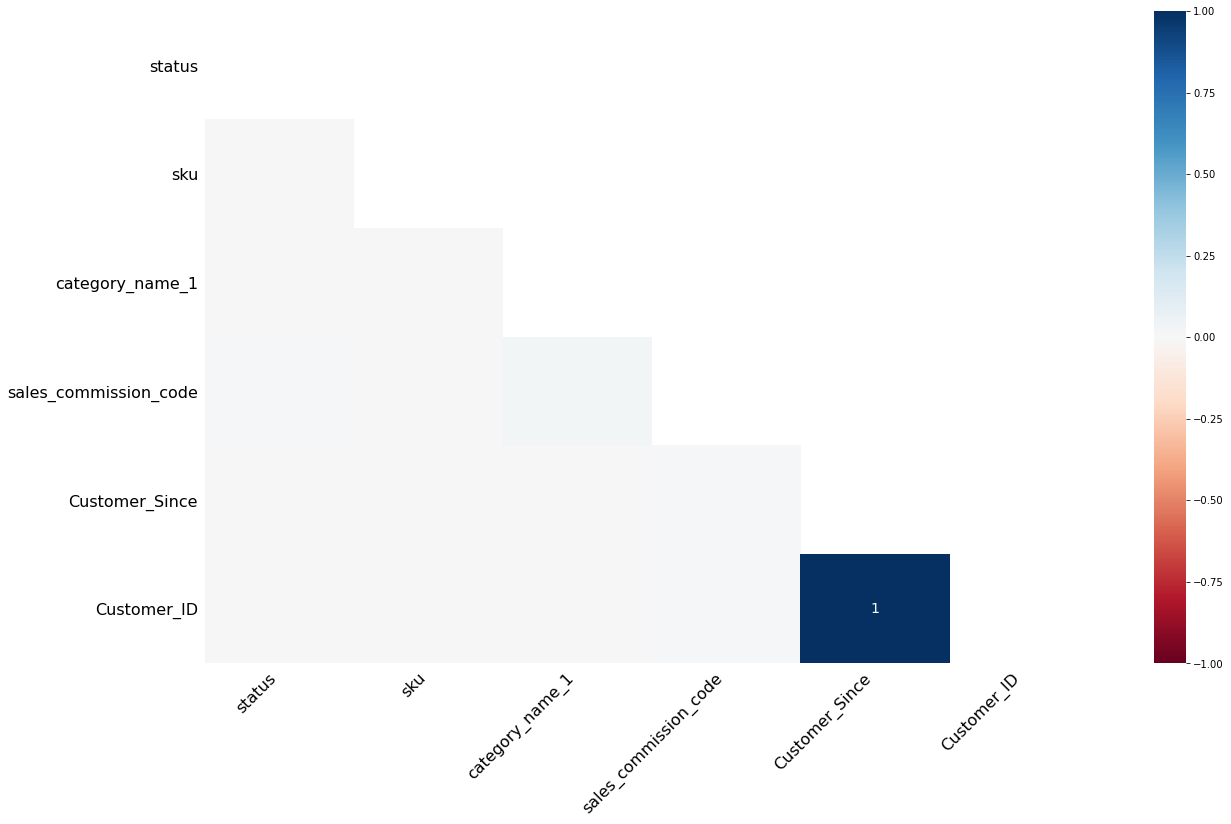

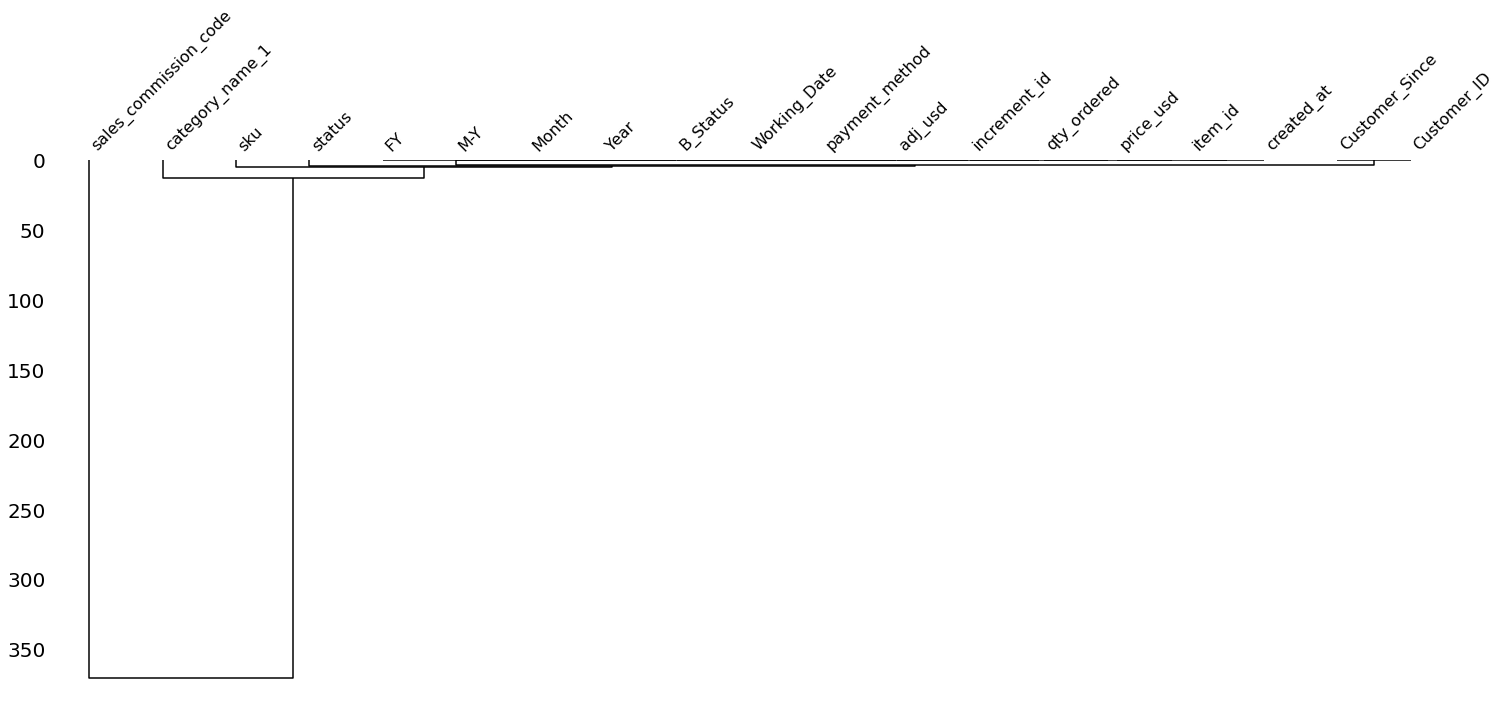

In [8]:
missno.bar(Df1, log=True) 

missno.heatmap(Df1) 

missno.dendrogram(Df1) 

# Clean up Strategy:
### 1. There are 19 Columns and 585K rows, a big dataset. Many clean up have to do.
### 2. Many columns are repeating or not so useful for Sales Projection/ Sales Improvements.
### 3. There are aslo missing elements, for example: Country, Regions.
### 4. Enhance the values of data, for example: Sales (Value on quantity and unit price only).
### 5. Focus on what we need for analysis, and store in a dataset for analysis.
### 6. The Dataset will be name from Df1 and roll up when changes, so any mistakes, can be roll back to previous dataframe with minimum rework.

## The Data/ Columns useful for the Data Analysis are price, quantity, CustomerID. etc.

### The Chart below Scatter Plot 1, showed the price_usd (Y axis) Vs. CustomerID (X axis):

Text(0, 0.5, 'price_usd')

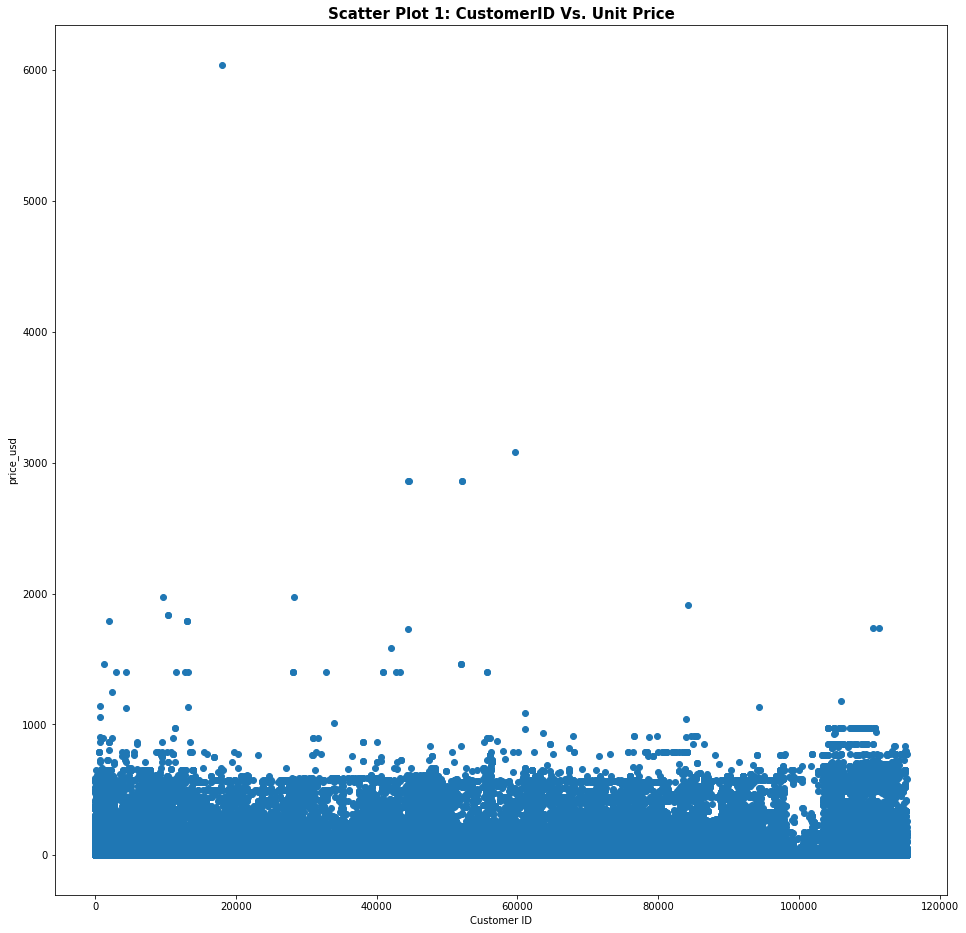

In [8]:

plt.rcParams['figure.figsize'] = 16, 16

xyPlot = plt.scatter(Df1.Customer_ID, Df1.price_usd)
plt.title("Scatter Plot 1: CustomerID Vs. Unit Price", fontweight="bold",fontsize=15)

plt.xlabel("Customer ID")
plt.ylabel('price_usd')

### The Chart below Scatter Plot 2, showed the Quantity (Y axis) Vs. Customer ID (X axis):

Text(0, 0.5, 'Quantity Ordered')

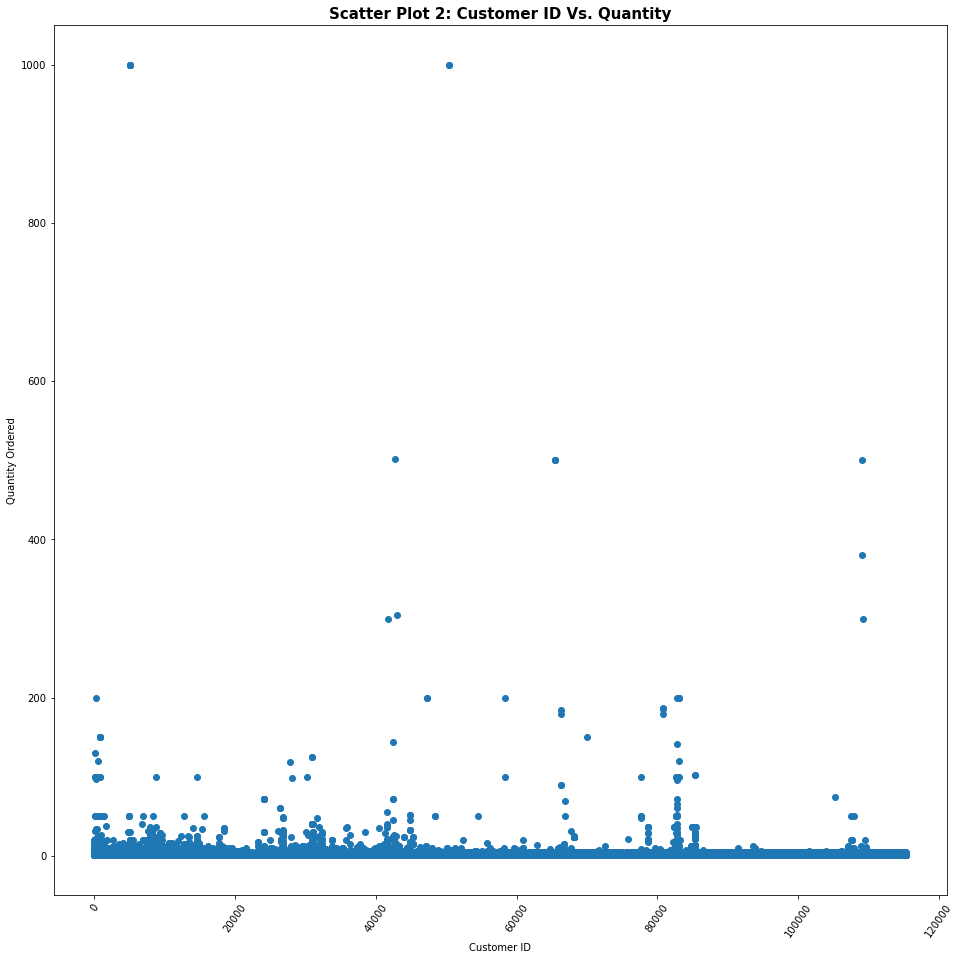

In [9]:

plt.rcParams['figure.figsize'] = 16, 16

xyPlot = plt.scatter(Df1.Customer_ID, Df1.qty_ordered)
plt.title("Scatter Plot 2: Customer ID Vs. Quantity", fontweight="bold",fontsize=15)

plt.xlabel("Customer ID")
plt.xticks(rotation=55)
plt.ylabel('Quantity Ordered')

In [10]:
## Check Df attributes ##
print(Df1.columns)
print("\n", Df1.shape)
print("\n", Df1.index)
print("\n", Df1.values)

Index(['item_id', 'status', 'created_at', 'sku', 'price_usd', 'qty_ordered',
       'increment_id', 'category_name_1', 'sales_commission_code', 'adj_usd',
       'payment_method', 'Working_Date', 'B_Status', 'Year', 'Month',
       'Customer_Since', 'M-Y', 'FY', 'Customer_ID'],
      dtype='object')

 (584524, 19)

 RangeIndex(start=0, stop=584524, step=1)

 [[211131 'complete' '7/1/2016' ... 'Jul-16' 'FY17' 1.0]
 [211133 'canceled' '7/1/2016' ... 'Jul-16' 'FY17' 2.0]
 [324257 'canceled' '11/25/2016' ... 'Nov-16' 'FY17' 2.0]
 ...
 [807010 'canceled' '3/27/2018' ... 'Mar-18' 'FY18' nan]
 [808287 'order_refunded' '3/27/2018' ... 'Mar-18' 'FY18' nan]
 [814174 'canceled' '3/28/2018' ... 'Mar-18' 'FY18' nan]]


### Indexed Plot 1, Finding 8: shows that the price distribution was consistent. 

C:\Users\wooo_\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Index(['item_id', 'status', 'created_at', 'sku', 'price_usd', 'qty_ordered',
       'increment_id', 'category_name_1', 'sales_commission_code', 'adj_usd',
       'payment_method', 'Working_Date', 'B_Status', 'Year', 'Month',
       'Customer_Since', 'M-Y', 'FY', 'Customer_ID'],
      dtype='object')


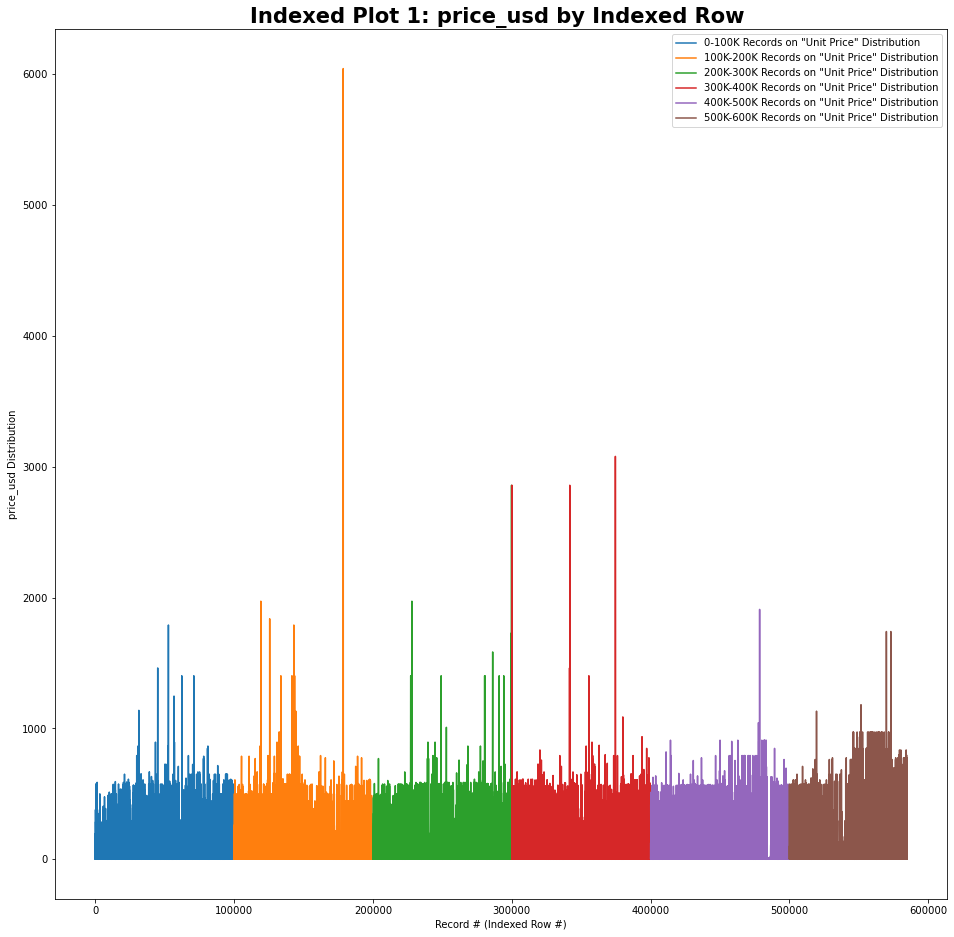

In [11]:
## EDA on price-usd distribution within same class##

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 16, 16
Df1 = pd.read_csv("eCommerceDataset1.csv", header=0)
print(Df1.columns)

firstHundredThousand = plt.plot(Df1['price_usd'][0:100000], label = '0-100K Records on "Unit Price" Distribution')  # Distribution 1
nextHundredThousand = plt.plot(Df1['price_usd'][100001:200000], label = '100K-200K Records on "Unit Price" Distribution')  # Distribution 2
nextHundredThousand = plt.plot(Df1['price_usd'][200001:300000], label = '200K-300K Records on "Unit Price" Distribution')  # Distribution 3
nextHundredThousand = plt.plot(Df1['price_usd'][300001:400000], label = '300K-400K Records on "Unit Price" Distribution')  # Distribution 4
nextHundredThousand = plt.plot(Df1['price_usd'][400001:500000], label = '400K-500K Records on "Unit Price" Distribution')  # Distribution 5
nextHundredThousand = plt.plot(Df1['price_usd'][500001:600000], label = '500K-600K Records on "Unit Price" Distribution')  # Distribution 6

plt.legend()
#includes legends based on the plotted lines
plt.title("Indexed Plot 1: price_usd by Indexed Row ", fontweight="bold",fontsize=21)
plt.xlabel("Record # (Indexed Row #)")
plt.ylabel("price_usd Distribution")
plt.show()

Index(['item_id', 'status', 'created_at', 'sku', 'price_usd', 'qty_ordered',
       'increment_id', 'category_name_1', 'sales_commission_code', 'adj_usd',
       'payment_method', 'Working_Date', 'B_Status', 'Year', 'Month',
       'Customer_Since', 'M-Y', 'FY', 'Customer_ID'],
      dtype='object')


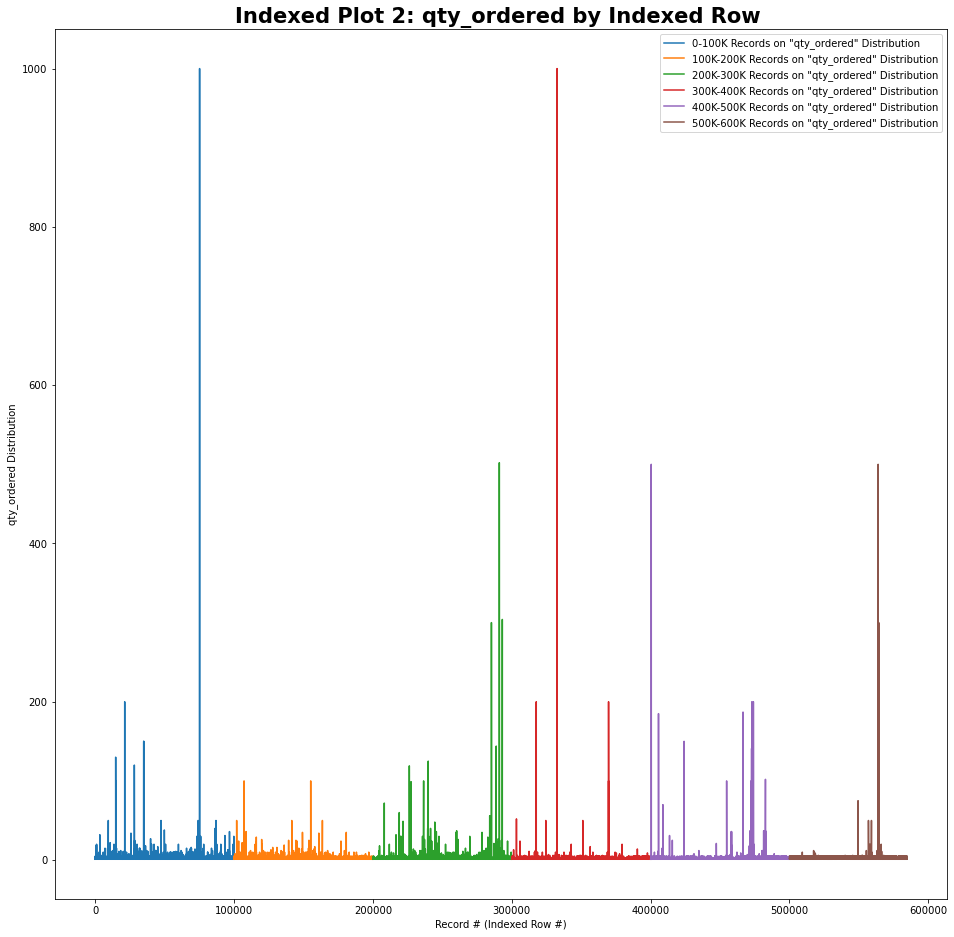

In [12]:
## EDA on qty_ordered distribution within same class##

plt.rcParams['figure.figsize'] = 16, 16
Df1 = pd.read_csv("eCommerceDataset1.csv", header=0)
print(Df1.columns)

firstHundredThousand = plt.plot(Df1['qty_ordered'][0:100000], label = '0-100K Records on "qty_ordered" Distribution')  # Distribution 1
nextHundredThousand = plt.plot(Df1['qty_ordered'][100001:200000], label = '100K-200K Records on "qty_ordered" Distribution')  # Distribution 2
nextHundredThousand = plt.plot(Df1['qty_ordered'][200001:300000], label = '200K-300K Records on "qty_ordered" Distribution')  # Distribution 3
nextHundredThousand = plt.plot(Df1['qty_ordered'][300001:400000], label = '300K-400K Records on "qty_ordered" Distribution')  # Distribution 4
nextHundredThousand = plt.plot(Df1['qty_ordered'][400001:500000], label = '400K-500K Records on "qty_ordered" Distribution')  # Distribution 5
nextHundredThousand = plt.plot(Df1['qty_ordered'][500001:600000], label = '500K-600K Records on "qty_ordered" Distribution')  # Distribution 6

plt.legend()
#includes legends based on the plotted lines
plt.title("Indexed Plot 2: qty_ordered by Indexed Row ", fontweight="bold",fontsize=21)
plt.xlabel("Record # (Indexed Row #)")
plt.ylabel("qty_ordered Distribution")
plt.show()

## State Based - Multiple Scatter Plots

In [13]:
##Setting up across all plots##

import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns

rcParams['figure.figsize'] = 14, 14 
#An instance of RcParams for handling default matplotlib values with x, y

sns.set_style('whitegrid')
# There are five preset seaborn themes: darkgrid, whitegrid, dark, white, and ticks

Df1 = pd.read_csv("eCommerceDataset1.csv", header=0)

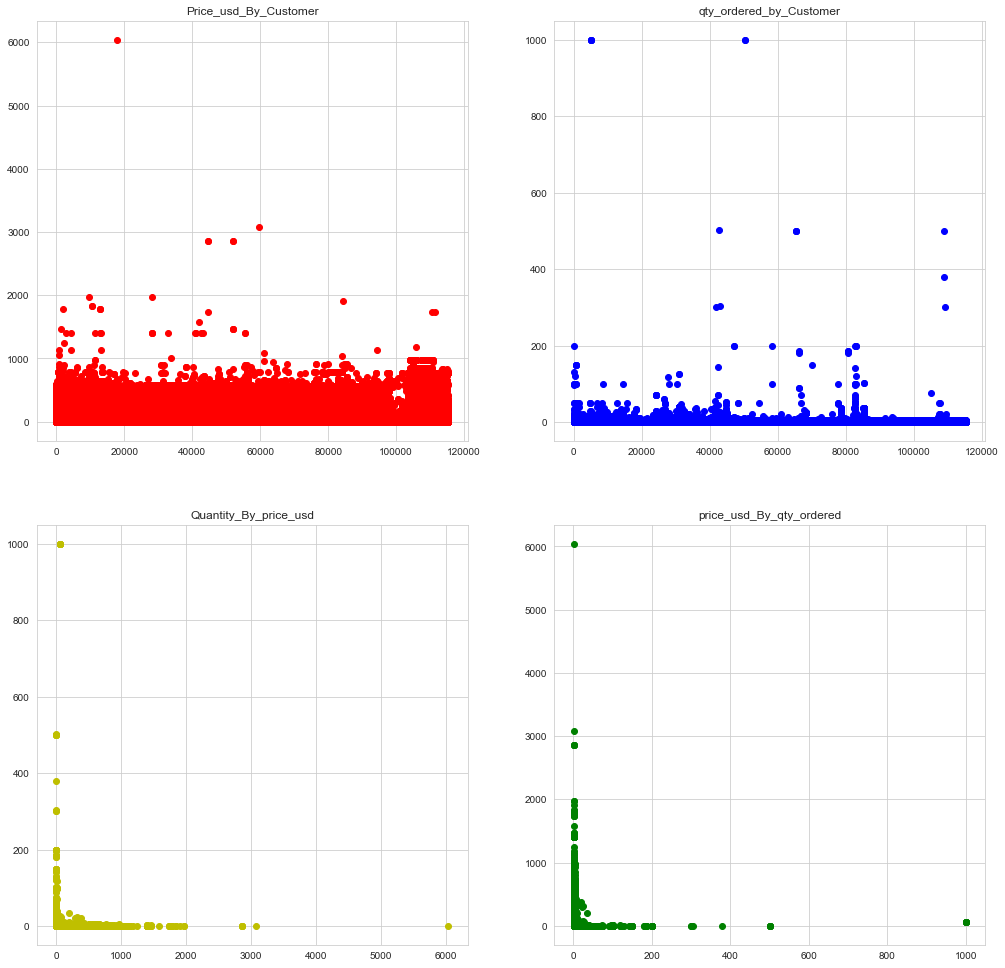

In [14]:
##subplot style##

plt.figure(figsize=(17,17))  

plt.subplot(2,2,1)
plt.scatter(Df1.Customer_ID, Df1.price_usd, c='r')
plt.title('Price_usd_By_Customer')

plt.subplot(2,2,2)
plt.scatter(Df1.Customer_ID, Df1.qty_ordered, c='b')
plt.title('qty_ordered_by_Customer')

plt.subplot(2,2,3)
plt.scatter(Df1.price_usd, Df1.qty_ordered, c='y')
plt.title('Quantity_By_price_usd')

plt.subplot(2,2,4)
plt.scatter(Df1.qty_ordered, Df1.price_usd, c='g')
plt.title('price_usd_By_qty_ordered')


plt.show()

### Box Plots to check the distributions

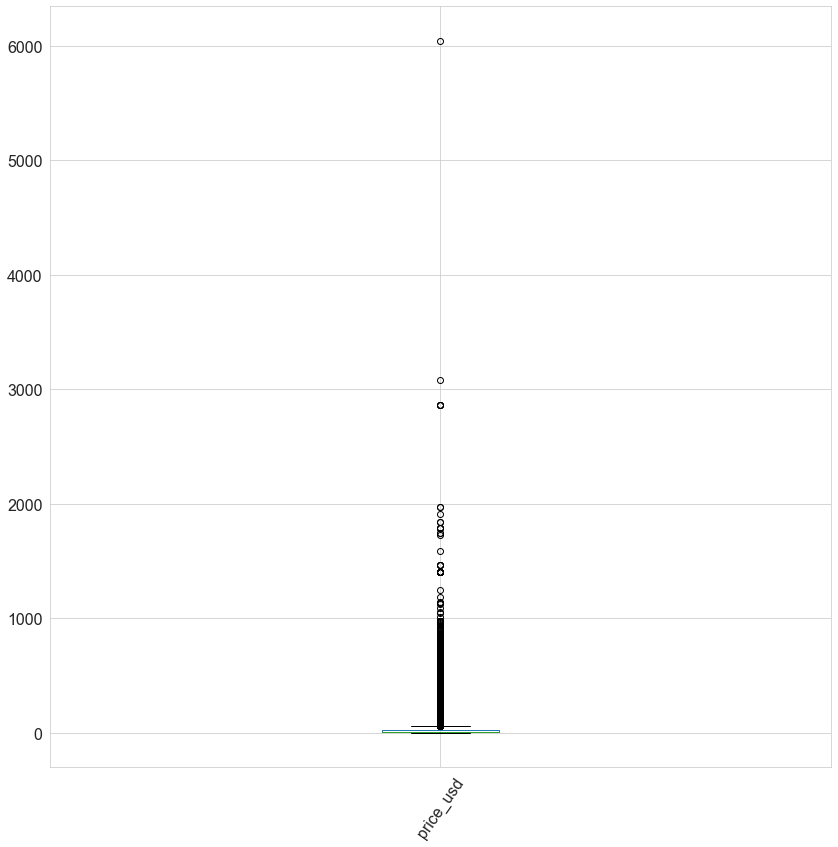

In [15]:
##Box Plots## 

#Note: Boxplot accepts numeric values

Df1.boxplot(column='price_usd', fontsize=16)

plt.xticks(rotation=55)

plt.show()

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(1, 0, 'Appliances'),
  Text(2, 0, 'Beauty & Grooming'),
  Text(3, 0, 'Books'),
  Text(4, 0, 'Computing'),
  Text(5, 0, 'Entertainment'),
  Text(6, 0, 'Health & Sports'),
  Text(7, 0, 'Home & Living'),
  Text(8, 0, 'Kids & Baby'),
  Text(9, 0, "Men's Fashion"),
  Text(10, 0, 'Mobiles & Tablets'),
  Text(11, 0, 'Others'),
  Text(12, 0, 'School & Education'),
  Text(13, 0, 'Soghaat'),
  Text(14, 0, 'Superstore'),
  Text(15, 0, "Women's Fashion"),
  Text(16, 0, '\\N')])

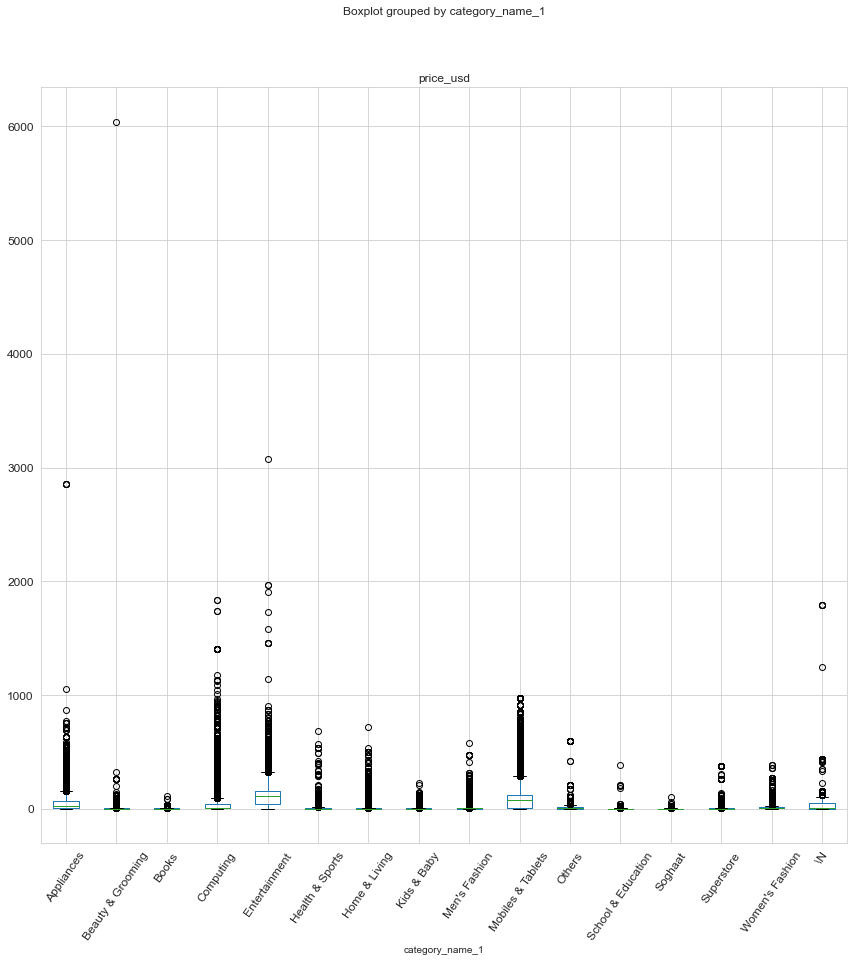

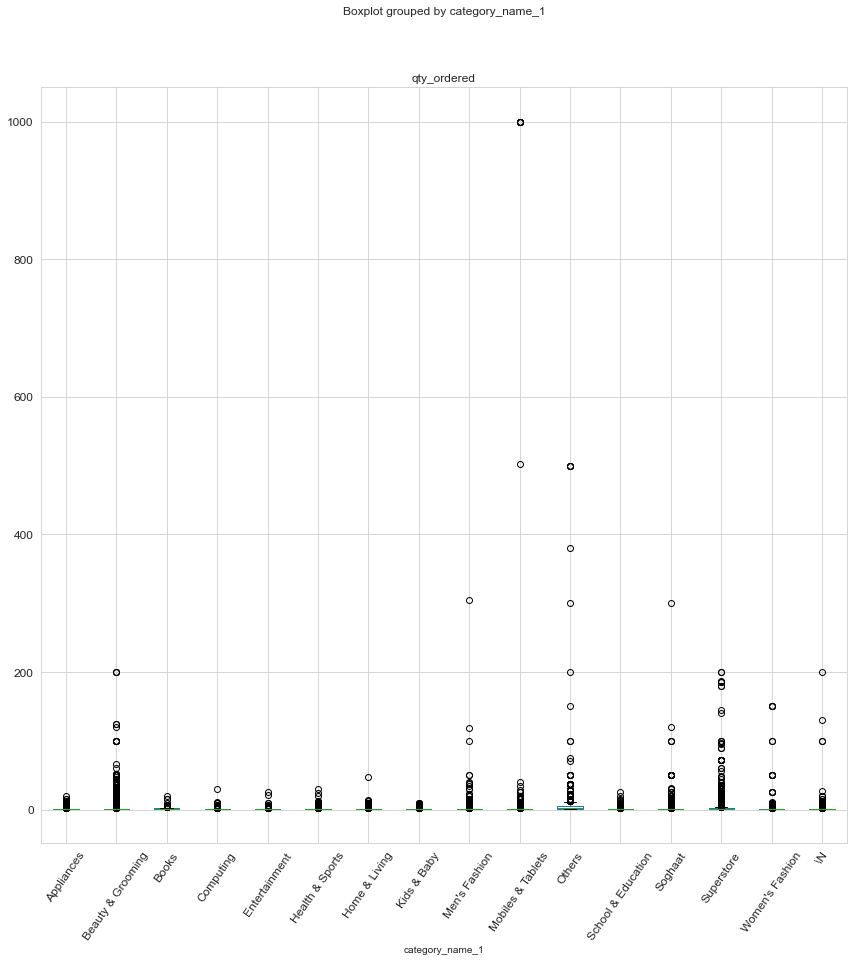

In [16]:
#try mix of categorical with boxplot

Df1.boxplot(column='price_usd', by='category_name_1', fontsize=12)
plt.xticks(rotation=55)
Df1.boxplot(column='qty_ordered', by='category_name_1', fontsize=12)
plt.xticks(rotation=55)

## Histogram

In [17]:
Df1.price_usd

0         11.63
1          1.43
2          1.61
3         14.62
4          3.16
          ...  
584519    29.83
584520     2.98
584521     2.98
584522     6.21
584523    11.93
Name: price_usd, Length: 584524, dtype: float64

[5.82379e+05 2.10600e+03 2.80000e+01 5.00000e+00 4.00000e+00 1.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00]


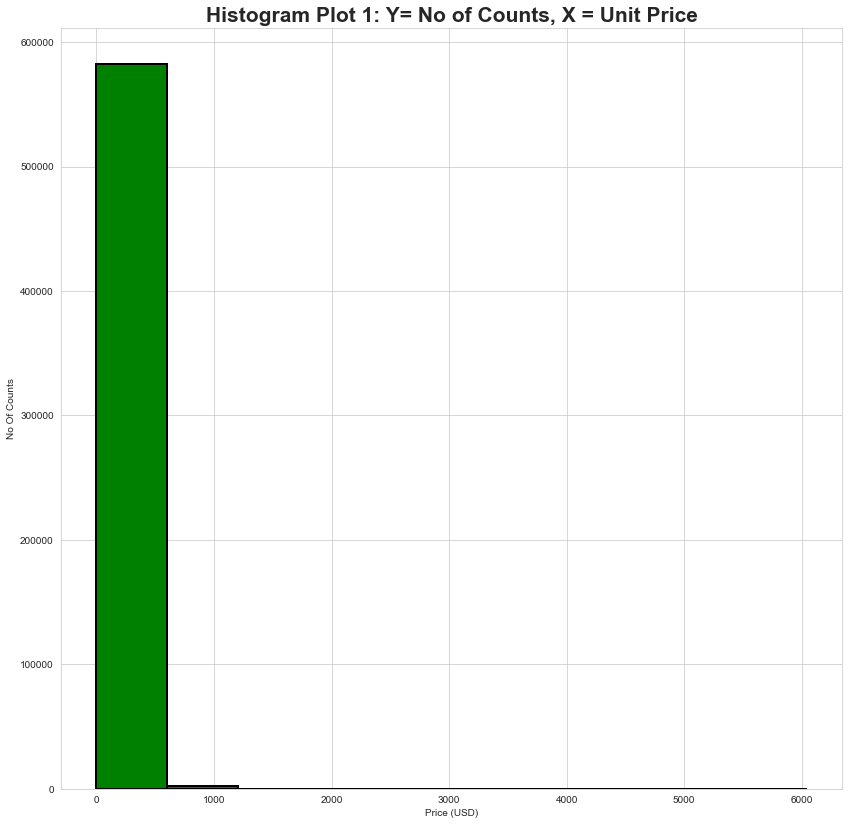

In [18]:
n, bins, patches = plt.hist(Df1.price_usd, color = ['green'], edgecolor='black',linewidth=(2))
print(n)

plt.title("Histogram Plot 1: Y= No of Counts, X = Unit Price", fontweight="bold",fontsize=21)
plt.xlabel("Price (USD)")
plt.ylabel('No Of Counts')
plt.show()

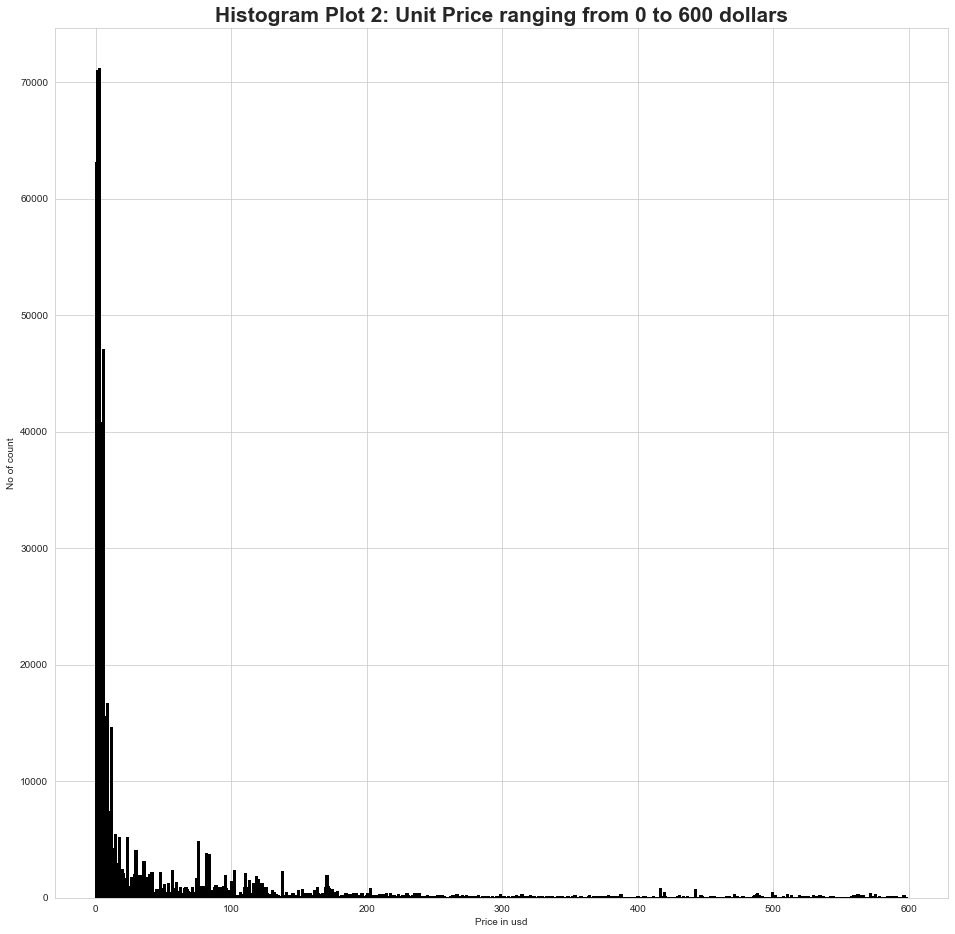

In [19]:
plt.rcParams['figure.figsize'] = 16, 16

n, bins, patches = plt.hist(Df1.price_usd, bins = range(0, 600), color = ['green'], edgecolor='black',linewidth=(2))

plt.title("Histogram Plot 2: Unit Price ranging from 0 to 600 dollars", fontweight="bold",fontsize=21)
plt.xlabel('Price in usd')
plt.ylabel('No of count')
plt.show()

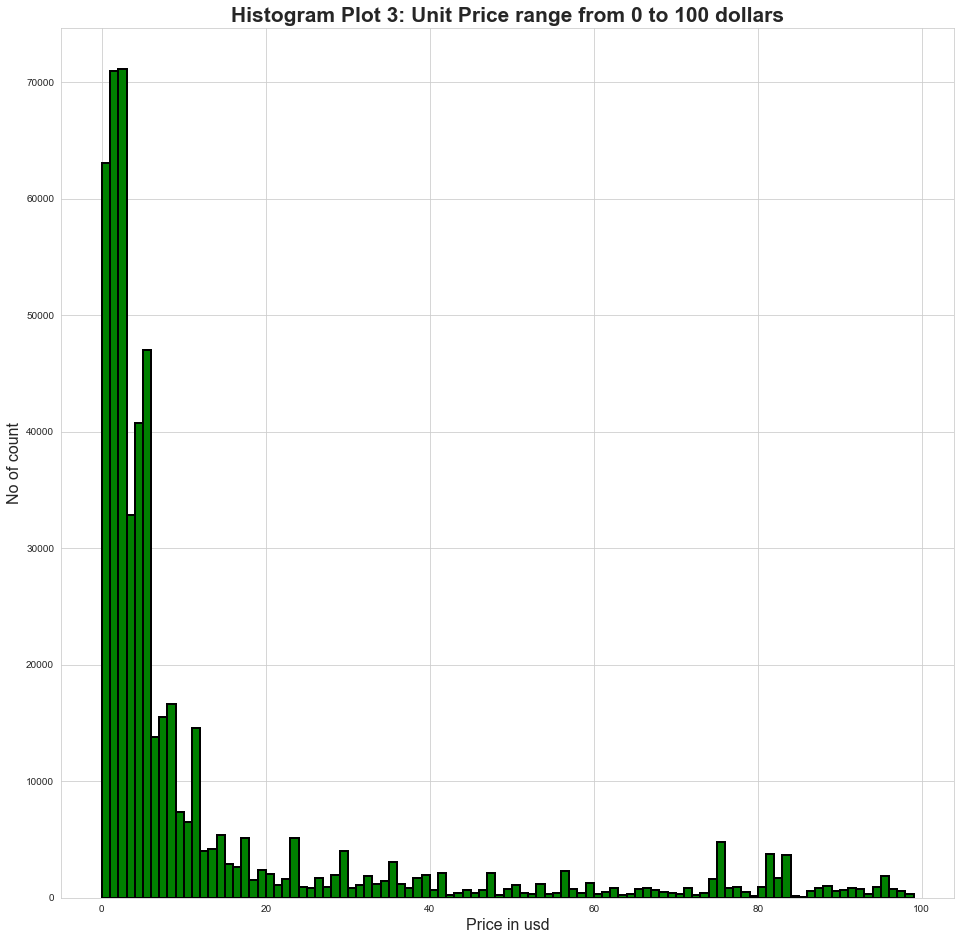

In [20]:
plt.rcParams['figure.figsize'] = 16, 16

n, bins, patches = plt.hist(Df1.price_usd, bins = range(0, 100), color = ['green'], edgecolor='black',linewidth=(2))

plt.title("Histogram Plot 3: Unit Price range from 0 to 100 dollars", fontweight="bold",fontsize=21)
plt.xlabel('Price in usd', fontsize=16)
plt.ylabel('No of count', fontsize=16)
plt.show()

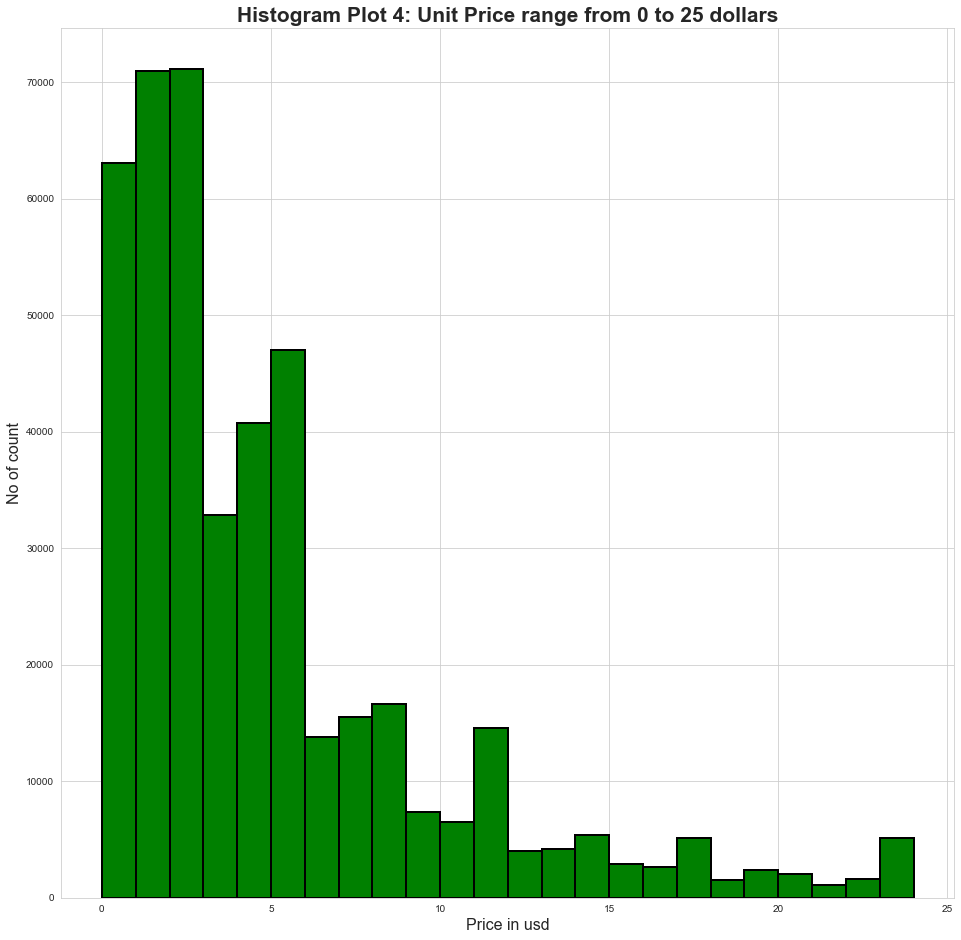

In [21]:
plt.rcParams['figure.figsize'] = 16, 16

n, bins, patches = plt.hist(Df1.price_usd, bins = range(0, 25), color = ['green'], edgecolor='black',linewidth=(2))

plt.title("Histogram Plot 4: Unit Price range from 0 to 25 dollars", fontweight="bold",fontsize=21)
plt.xlabel('Price in usd', fontsize=16)
plt.ylabel('No of count', fontsize=16)
plt.show()

In [22]:
Df1.qty_ordered

0         1
1         1
2         1
3         1
4         1
         ..
584519    2
584520    2
584521    4
584522    1
584523    5
Name: qty_ordered, Length: 584524, dtype: int64

[5.84482e+05 2.70000e+01 2.00000e+00 2.00000e+00 4.00000e+00 1.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 6.00000e+00]


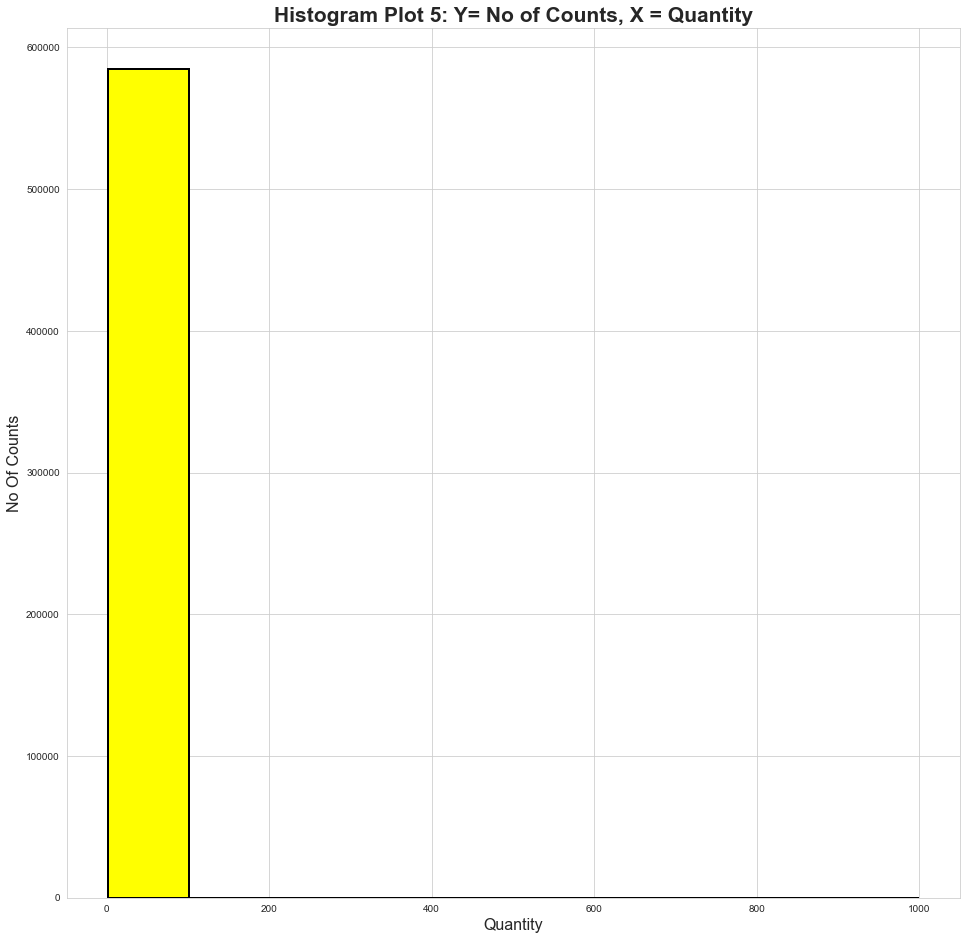

In [23]:
n, bins, patches = plt.hist(Df1.qty_ordered, color = ['yellow'], edgecolor='black',linewidth=(2))
print(n)

plt.title("Histogram Plot 5: Y= No of Counts, X = Quantity", fontweight="bold",fontsize=21)
plt.xlabel("Quantity", fontsize=16)
plt.ylabel('No Of Counts', fontsize=16)
plt.show()

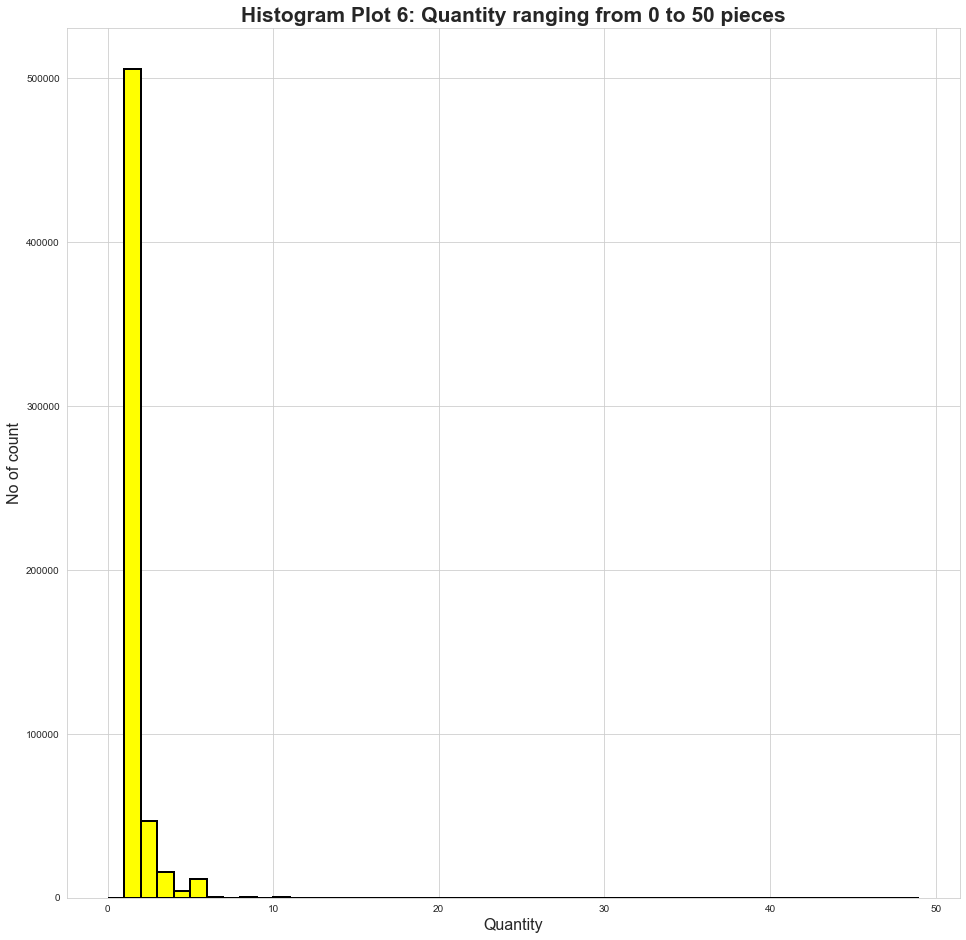

In [24]:
plt.rcParams['figure.figsize'] = 16, 16

n, bins, patches = plt.hist(Df1.qty_ordered, bins = range(0, 50), color = ['yellow'], edgecolor='black',linewidth=(2))

plt.title("Histogram Plot 6: Quantity ranging from 0 to 50 pieces", fontweight="bold",fontsize=21)
plt.xlabel('Quantity', fontsize=16)
plt.ylabel('No of count', fontsize=16)
plt.show()

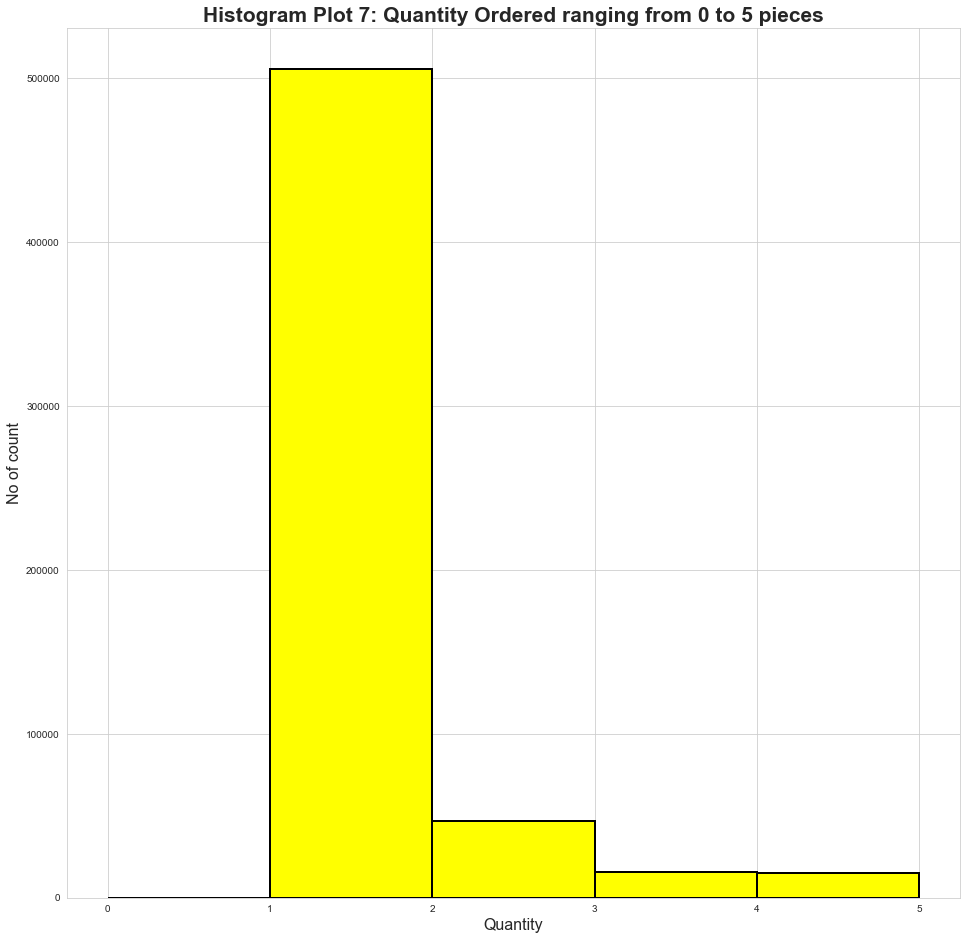

In [25]:
plt.rcParams['figure.figsize'] = 16, 16

n, bins, patches = plt.hist(Df1.qty_ordered, bins = range(0, 6), color = ['yellow'], edgecolor='black',linewidth=(2))

plt.title("Histogram Plot 7: Quantity Ordered ranging from 0 to 5 pieces", fontweight="bold",fontsize=21)
plt.xlabel('Quantity', fontsize=16)
plt.ylabel('No of count', fontsize=16)
plt.show()

# Adding Country and Regions into this Dataset in 2 steps
## From both internal dataset (Invoicing dataset) and external (Covid) Dataset
## 1. Joining the Invoice Dataset (internal) to include "Country" in the Working dataframe, Df1
## 2. Adding Regions to the dataset (using Country to merge).

### 1. The Invoice Dataset (Df2) - Other column was removed.

In [26]:
## Read the Invoice Dataset (Internal)

Df2 = pd.read_csv("eCommerce_CustomerID_country_invoice18.csv", header=0) 

print(Df2)

        Customer_ID               Country
0               1.0             Australia
1               2.0             Australia
2               3.0             Australia
3               4.0             Australia
4               5.0             Australia
...             ...                   ...
115322     115323.0                 Spain
115323     115324.0                Sweden
115324     115325.0           Switzerland
115325     115326.0  United Arab Emirates
115326          NaN        United Kingdom

[115327 rows x 2 columns]


In [27]:
print(Df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115327 entries, 0 to 115326
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Customer_ID  115326 non-null  float64
 1   Country      115327 non-null  object 
dtypes: float64(1), object(1)
memory usage: 1.8+ MB
None


In [28]:
print(Df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584524 entries, 0 to 584523
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  int64  
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price_usd              584524 non-null  float64
 5   qty_ordered            584524 non-null  int64  
 6   increment_id           584524 non-null  object 
 7   category_name_1        584360 non-null  object 
 8   sales_commission_code  447349 non-null  object 
 9   adj_usd                584524 non-null  float64
 10  payment_method         584524 non-null  object 
 11  Working_Date           584524 non-null  object 
 12  B_Status               584524 non-null  object 
 13  Year                   584524 non-null  int64  
 14  Month                  584524 non-nu

### Joining the eCommerceDataset with the Invoice Dataset (internal Dataset) ==> Df3

In [29]:
Df3 = pd.merge(Df1, Df2, on='Customer_ID')

print(Df3)


        item_id          status  created_at  \
0        211131        complete    7/1/2016   
1        211133        canceled    7/1/2016   
2        324257        canceled  11/25/2016   
3        211134        canceled    7/1/2016   
4        473369        complete   5/19/2017   
...         ...             ...         ...   
584519   804621        canceled   3/27/2018   
584520   805750        canceled   3/27/2018   
584521   807010        canceled   3/27/2018   
584522   808287  order_refunded   3/27/2018   
584523   814174        canceled   3/28/2018   

                                                      sku  price_usd  \
0                                       kreations_YI 06-L      11.63   
1       kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...       1.43   
2                                     RS_Habshi Halwa Tin       1.61   
3                                      Ego_UP0017-999-MR0      14.62   
4                                               BT_BT-422       3.16   
...

### Removing the Nan at Column (Customer_ID) after merging the datasets

In [30]:
import pandas as pd


# under certain label
Df4 = Df3.dropna(subset=['Customer_ID'])
 
# Resetting the indices using df.reset_index()
Df4 = Df4.reset_index(drop=True)
 
print(Df4)

        item_id      status  created_at  \
0        211131    complete    7/1/2016   
1        211133    canceled    7/1/2016   
2        324257    canceled  11/25/2016   
3        211134    canceled    7/1/2016   
4        473369    complete   5/19/2017   
...         ...         ...         ...   
584508   905179        paid   8/28/2018   
584509   905191         cod   8/28/2018   
584510   905200         cod   8/28/2018   
584511   905202         cod   8/28/2018   
584512   905205  processing   8/28/2018   

                                                      sku  price_usd  \
0                                       kreations_YI 06-L      11.63   
1       kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...       1.43   
2                                     RS_Habshi Halwa Tin       1.61   
3                                      Ego_UP0017-999-MR0      14.62   
4                                               BT_BT-422       3.16   
...                                                

In [31]:
Df3 = Df4  ## Update the Dateset

print(Df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584513 entries, 0 to 584512
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584513 non-null  int64  
 1   status                 584498 non-null  object 
 2   created_at             584513 non-null  object 
 3   sku                    584493 non-null  object 
 4   price_usd              584513 non-null  float64
 5   qty_ordered            584513 non-null  int64  
 6   increment_id           584513 non-null  object 
 7   category_name_1        584349 non-null  object 
 8   sales_commission_code  447349 non-null  object 
 9   adj_usd                584513 non-null  float64
 10  payment_method         584513 non-null  object 
 11  Working_Date           584513 non-null  object 
 12  B_Status               584513 non-null  object 
 13  Year                   584513 non-null  int64  
 14  Month                  584513 non-nu

## Finding the Number of Unique Records in the Dataset (Find the Unique ID)

### Number of unique Country: 37 in Df3 

In [32]:

country_count = []

cnt = 0

for i in range(0, len(Df3['Country'])):
    
    if Df3['Country'][i] not in country_count: 
        
        country_count.append(Df3['Country'][i])
          
        cnt += 1
  
print("No of unique Country :", cnt)
  
print("The unique Countries are :", country_count)


No of unique Country : 37
The unique Countries are : ['Australia', 'Denmark', 'EIRE', 'European Community', 'Finland', 'Lebanon', 'Lithuania', 'Malta', 'Netherlands', 'Switzerland', 'United Arab Emirates', 'United Kingdom', 'Unspecified', 'USA', 'Saudi Arabia', 'Singapore', 'Brazil', 'Canada', 'Channel Islands', 'Cyprus', 'Czech Republic', 'France', 'Germany', 'Greece', 'Iceland', 'Israel', 'RSA', 'Spain', 'Italy', 'Japan', 'Norway', 'Poland', 'Portugal', 'Sweden', 'Austria', 'Bahrain', 'Belgium']


## Finding Min, max, mode, and range in a column

### Quantity:

In [33]:
# get the maximum value of the column 'Quantity'

max_quantity = Df3['qty_ordered'].max()
min_quantity = Df3['qty_ordered'].min()
mode_quantity = Df3['qty_ordered'].mode()

print("The largest quantity ordered is:", max_quantity)
print("The smallest quantity ordered is:", min_quantity)
print("The most frequent ordered quantity is:", mode_quantity)


The largest quantity ordered is: 1000
The smallest quantity ordered is: 1
The most frequent ordered quantity is: 0    1
dtype: int64


### Note: Need to clean up the negative and zero values

### Unit Price:

In [34]:
# get the maximum value of the column 'UnitPrice'

max_unitprice = Df3['price_usd'].max()
min_unitprice = Df3['price_usd'].min()
mode_unitprice = Df3['price_usd'].mode()

print("The highest unit price is:", max_unitprice)
print("The lowest unit price is:", min_unitprice)
print("The most frequent used unit price is:", mode_unitprice)


The highest unit price is: 6041.92
The lowest unit price is: 0.0
The most frequent used unit price is: 0    2.98
dtype: float64


### Note: Need to clean up the negative and zero unit price

### The zero unit price is most likely a typo. In this case, the decision is to delete the records (rows)

In [35]:
Df3 =Df3.query("price_usd > 0")   # Using Dataframe for making the changes.

Df3 = Df3.reset_index(drop=True)

In [36]:
# get the maximum value of the column 'UnitPrice'

max_unitprice = Df3['price_usd'].max()
min_unitprice = Df3['price_usd'].min()
mode_unitprice = Df3['price_usd'].mode()

print("The highest unit price is:", max_unitprice)
print("The lowest unit price is:", min_unitprice)
print("The most frequent used unit price is:", mode_unitprice)

The highest unit price is: 6041.92
The lowest unit price is: 0.01
The most frequent used unit price is: 0    2.98
dtype: float64


### The 0.0 price was removed. done.

## Adding Regions in the dataset from using Country/ ISO code from Covid Dataset:
### 1. There are 37 countries in this dataset. Suggest to creat a new Subgroup. 
### 2. This could be grouped by Asia, Europe etc. (Adding ISO Code and Regions column from Covid Dataset). This changes the dataframe structure.


## Restructure DataFrame by adding in new ISO code and Regions (COVID Dataset) DfC:

In [37]:
## Read the Country Code Dataset

DfC = pd.read_csv("Country Code.csv", header=0) 

print(DfC)

              location iso_code continent
0          Afghanistan      AFG      Asia
1              Albania      ALB    Europe
2              Algeria      DZA    Africa
3              Andorra      AND    Europe
4               Angola      AGO    Africa
..                 ...      ...       ...
213            Vietnam      VNM      Asia
214  Wallis and Futuna      WLF   Oceania
215              Yemen      YEM      Asia
216             Zambia      ZMB    Africa
217           Zimbabwe      ZWE    Africa

[218 rows x 3 columns]


### Rename the columns for joining the 2 dataframes.

In [38]:
DfC.columns = ['Country', 'ISO_code', 'Regions']

print(DfC)

               Country ISO_code  Regions
0          Afghanistan      AFG     Asia
1              Albania      ALB   Europe
2              Algeria      DZA   Africa
3              Andorra      AND   Europe
4               Angola      AGO   Africa
..                 ...      ...      ...
213            Vietnam      VNM     Asia
214  Wallis and Futuna      WLF  Oceania
215              Yemen      YEM     Asia
216             Zambia      ZMB   Africa
217           Zimbabwe      ZWE   Africa

[218 rows x 3 columns]


### Creat a List for the 218 countries

In [39]:

isocountry_list = []

cnt = 0

for i in range(0, len(DfC['Country'])):
    
    if DfC['Country'][i] not in isocountry_list: 
        
        isocountry_list.append(DfC['Country'][i])
          
        cnt += 1
  
print("No of unique Country:", cnt)
  
print("The unique Countries are:", isocountry_list)

No of unique Country: 218
The unique Countries are: ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Faeroe Islands', 'Falkland Islands', 'Fiji', 'Finland', 'Franc

### Joining the 2 DataFrame (DataFrame 1 (Df1) and DataFrameC (DfC) using "Country"

In [40]:
Df4 = pd.merge(Df3, DfC, on='Country')

print(Df4)

        item_id    status  created_at  \
0        211131  complete    7/1/2016   
1        211133  canceled    7/1/2016   
2        324257  canceled  11/25/2016   
3        211134  canceled    7/1/2016   
4        473369  complete   5/19/2017   
...         ...       ...         ...   
466587   904365  received   8/25/2018   
466588   904607  canceled   8/26/2018   
466589   904608  canceled   8/26/2018   
466590   904796  canceled   8/27/2018   
466591   904987    holded   8/27/2018   

                                                      sku  price_usd  \
0                                       kreations_YI 06-L      11.63   
1       kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...       1.43   
2                                     RS_Habshi Halwa Tin       1.61   
3                                      Ego_UP0017-999-MR0      14.62   
4                                               BT_BT-422       3.16   
...                                                   ...        ...   
466

### Note: 2 New Columns were included in the DataFrame2, Iso and Regions It looks good.

## Double check if the Country Counts remains the same:

### The original 37 countries in Df3 (Before merged):

In [41]:

country_list = []

cnt = 0

for i in range(0, len(Df3['Country'])):
    
    if Df3['Country'][i] not in country_list: 
        
        country_list.append(Df3['Country'][i])
          
        cnt += 1
  
print("No of unique Country before merged:", cnt)
print()  
print("The unique Countries are :", country_list)


No of unique Country before merged: 37

The unique Countries are : ['Australia', 'Denmark', 'EIRE', 'European Community', 'Finland', 'Lebanon', 'Lithuania', 'Malta', 'Netherlands', 'Switzerland', 'United Arab Emirates', 'United Kingdom', 'Unspecified', 'USA', 'Saudi Arabia', 'Singapore', 'Brazil', 'Canada', 'Channel Islands', 'Cyprus', 'Czech Republic', 'France', 'Germany', 'Greece', 'Iceland', 'Israel', 'RSA', 'Spain', 'Italy', 'Japan', 'Norway', 'Poland', 'Portugal', 'Sweden', 'Austria', 'Bahrain', 'Belgium']


### The countries in the merged dataset (Df4):

In [42]:

mergedcountry_count = []

cnt = 0

for i in range(0, len(Df4['Country'])):
    
    if Df4['Country'][i] not in mergedcountry_count: 
        
        mergedcountry_count.append(Df4['Country'][i])
          
        cnt += 1
  
print("No of unique Country after merged:", cnt)
print()  
print("The merged Countries list is:", mergedcountry_count)


No of unique Country after merged: 30

The merged Countries list is: ['Australia', 'Denmark', 'Finland', 'Lebanon', 'Lithuania', 'Malta', 'Netherlands', 'Switzerland', 'United Arab Emirates', 'United Kingdom', 'Saudi Arabia', 'Singapore', 'Brazil', 'Canada', 'Cyprus', 'France', 'Germany', 'Greece', 'Iceland', 'Israel', 'Spain', 'Italy', 'Japan', 'Norway', 'Poland', 'Portugal', 'Sweden', 'Austria', 'Bahrain', 'Belgium']


### Problem: There is 7 Countries short in the merged (Df4)!!

In [43]:
if_contains = country_list

have_list = []

words = isocountry_list

for word in words:
    for el in if_contains:
        if el in word:
            have_list.append(word)

print("The no of country in the merged list is:", len(have_list))
print()
print("The Countries in the original dateset has", len(country_list)-len(have_list), "More countries")
print()
print("Only these countries are in the merged Df4:")
print(have_list)

The no of country in the merged list is: 30

The Countries in the original dateset has 7 More countries

Only these countries are in the merged Df4:
['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada', 'Cyprus', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon', 'Lithuania', 'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Saudi Arabia', 'Singapore', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates', 'United Kingdom']


In [44]:

set1 = set(have_list)
set2 = set(country_list)

missing_country = set1.symmetric_difference(set2)

print("The no of missing country is:", len(missing_country))
print()
print("The missing countries are:", missing_country)


The no of missing country is: 7

The missing countries are: {'RSA', 'Channel Islands', 'USA', 'Czech Republic', 'Unspecified', 'EIRE', 'European Community'}


### Double check if the 7 missing countries are in the ISO Countries List (DfC): 


In [45]:
if_contains = missing_country

check_list = []

words = isocountry_list

for word in words:
    for el in if_contains:
        if el in word:
            check_list.append(word)

print("The no of missing country in the isocountry list is:", len(check_list))
#print()
#print("The Countries in the dateset has", len(country_list)-len(have_list), "More countries")
#print()
#print("Only these countries are in the merged Df4:")
print(check_list)

The no of missing country in the isocountry list is: 0
[]


### These 7 countries were not in the ISO Dataset!!

### Manually review these 7 missing countries:

In [46]:
print()
print("The missing countries are:", missing_country)



The missing countries are: {'RSA', 'Channel Islands', 'USA', 'Czech Republic', 'Unspecified', 'EIRE', 'European Community'}


## Problem-solving after checked on these 7 countries:
### Below is to amend the DataFrame to avoid deleting the data:
### 1. Channel Islands is not a Country, So to add to the ISO List (to group it under Europe)
### 2. The USA should be United States (in ISO dataset). - To amend DataFrame
### 3. European Community is not a country - to change it to unspecified
### 4. Czech Republic is now Czechia (in ISO dataset) - amend the dataFrame
### 5. EIRE is Ireland (in ISO dataset) - To amend the DataFrame
### 6. Add Unspecified into the ISO Country List before merging
### 7. No RSA as a country, it could be some data entry errors, to change it to unspecified.
### 



## Below is to amend the ISO Country to avoid deleting the data:
### 1. Channel Islands is not a Country, So to add to the ISO List (to group it under Europe)
### 2. Add Unspecified into the ISO Country List before merging.
 

## Correcting the countries issues (Df5):

In [47]:
Df5 = Df3

Df5["Country"].replace({"USA": "United States", "EIRE": "Ireland", "RSA": "Unspecified", "Czech Republic": "Czechia", "European Community": "Unspecified"}, inplace=True)

print(Df5)

        item_id      status  created_at  \
0        211131    complete    7/1/2016   
1        211133    canceled    7/1/2016   
2        324257    canceled  11/25/2016   
3        211134    canceled    7/1/2016   
4        473369    complete   5/19/2017   
...         ...         ...         ...   
582227   905179        paid   8/28/2018   
582228   905191         cod   8/28/2018   
582229   905200         cod   8/28/2018   
582230   905202         cod   8/28/2018   
582231   905205  processing   8/28/2018   

                                                      sku  price_usd  \
0                                       kreations_YI 06-L      11.63   
1       kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...       1.43   
2                                     RS_Habshi Halwa Tin       1.61   
3                                      Ego_UP0017-999-MR0      14.62   
4                                               BT_BT-422       3.16   
...                                                

In [48]:
newcountry_list = []

cnt = 0

for i in range(0, len(Df5['Country'])):
    
    if Df5['Country'][i] not in newcountry_list: 
        
        newcountry_list.append(Df5['Country'][i])
          
        cnt += 1
  
print("No of new unique Country in the merged Df6:", cnt)
print()  
print("The unique new Countries are :", newcountry_list)

No of new unique Country in the merged Df6: 35

The unique new Countries are : ['Australia', 'Denmark', 'Ireland', 'Unspecified', 'Finland', 'Lebanon', 'Lithuania', 'Malta', 'Netherlands', 'Switzerland', 'United Arab Emirates', 'United Kingdom', 'United States', 'Saudi Arabia', 'Singapore', 'Brazil', 'Canada', 'Channel Islands', 'Cyprus', 'Czechia', 'France', 'Germany', 'Greece', 'Iceland', 'Israel', 'Spain', 'Italy', 'Japan', 'Norway', 'Poland', 'Portugal', 'Sweden', 'Austria', 'Bahrain', 'Belgium']


### Adding 2 rows in the ISO Code (DfC1)

In [49]:
DfC1 = DfC

# DfC1 = pd.read_csv("Country Code.csv", header=0) 
# DfC1.columns = ['Country', 'ISO_code', 'Regions']

DfC1.loc[len(DfC1.index)] = ['Channel Islands', 'Channel Islands', 'Europe']
DfC1.loc[len(DfC1.index)] = ['Unspecified', 'Unspecified', 'Unspecified']

print(DfC1)

             Country         ISO_code      Regions
0        Afghanistan              AFG         Asia
1            Albania              ALB       Europe
2            Algeria              DZA       Africa
3            Andorra              AND       Europe
4             Angola              AGO       Africa
..               ...              ...          ...
215            Yemen              YEM         Asia
216           Zambia              ZMB       Africa
217         Zimbabwe              ZWE       Africa
218  Channel Islands  Channel Islands       Europe
219      Unspecified      Unspecified  Unspecified

[220 rows x 3 columns]


### 2nd joining the 2 DataFrame (Df5) and DataFrameC (DfC1) using "Country" ==> Df6
### Df6, the most updated Dataframe including all corrections so far.

In [50]:
Df6 = pd.merge(Df5, DfC1, on='Country')

print(Df6)  ## Most updated Dataframe including all corrections so far.

        item_id    status  created_at  \
0        211131  complete    7/1/2016   
1        211133  canceled    7/1/2016   
2        324257  canceled  11/25/2016   
3        211134  canceled    7/1/2016   
4        473369  complete   5/19/2017   
...         ...       ...         ...   
582227   904365  received   8/25/2018   
582228   904607  canceled   8/26/2018   
582229   904608  canceled   8/26/2018   
582230   904796  canceled   8/27/2018   
582231   904987    holded   8/27/2018   

                                                      sku  price_usd  \
0                                       kreations_YI 06-L      11.63   
1       kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...       1.43   
2                                     RS_Habshi Halwa Tin       1.61   
3                                      Ego_UP0017-999-MR0      14.62   
4                                               BT_BT-422       3.16   
...                                                   ...        ...   
582

### Review Countries in the new merging....
### No of new unique Country in the merged Df6: 35 - and this is correct!

In [51]:

newcountry_list = []

cnt = 0

for i in range(0, len(Df6['Country'])):
    
    if Df6['Country'][i] not in newcountry_list: 
        
        newcountry_list.append(Df6['Country'][i])
          
        cnt += 1
  
print("No of new unique Country in the merged Df6:", cnt)
print()  
print("The unique new Countries are :", newcountry_list)


No of new unique Country in the merged Df6: 35

The unique new Countries are : ['Australia', 'Denmark', 'Ireland', 'Unspecified', 'Finland', 'Lebanon', 'Lithuania', 'Malta', 'Netherlands', 'Switzerland', 'United Arab Emirates', 'United Kingdom', 'United States', 'Saudi Arabia', 'Singapore', 'Brazil', 'Canada', 'Channel Islands', 'Cyprus', 'Czechia', 'France', 'Germany', 'Greece', 'Iceland', 'Israel', 'Spain', 'Italy', 'Japan', 'Norway', 'Poland', 'Portugal', 'Sweden', 'Austria', 'Bahrain', 'Belgium']


### The new country list is now 35 and is correct (original 37 ==> Now 35). 
### 2 countries ("RSA" and "European Community") were eliminated, their data are now under "Unspecified".

## List of the New Regions:

In [52]:

regions_count = []

cnt = 0

for i in range(0, len(Df6['Regions'])):
    
    if Df6['Regions'][i] not in regions_count: 
        
        regions_count.append(Df6['Regions'][i])
          
        cnt += 1
  
print("No of unique Regions :", cnt)
  
print("The unique Regions are :", regions_count)


No of unique Regions : 6
The unique Regions are : ['Oceania', 'Europe', 'Unspecified', 'Asia', 'North America', 'South America']


## Summary of adding Countries and Regions:
### The including of Countries were from the internal Invoice Dataset set from Accounting Dept.
### The including of Regions were from external Covid Dataset, some cleaning and modifications were required.
### 1. The New Df6 is now have 35 countries, after eliminated RSA and European Community were droped from the Country and data were included in the Unspecified.
### 2. The New Df6 is now have a Regions grouping (6 Regions) for better Data Analysis and projection and management actions.



### Saving Df6 into .csv file. (Naming file as "eCommerceDataset1_Group1_r01.csv")

In [53]:

Df6.to_csv('eCommerceDataset1_Group1_r01.csv', index=False)

print("Dataframe 6:")
print(Df6)

Dataframe 6:
        item_id    status  created_at  \
0        211131  complete    7/1/2016   
1        211133  canceled    7/1/2016   
2        324257  canceled  11/25/2016   
3        211134  canceled    7/1/2016   
4        473369  complete   5/19/2017   
...         ...       ...         ...   
582227   904365  received   8/25/2018   
582228   904607  canceled   8/26/2018   
582229   904608  canceled   8/26/2018   
582230   904796  canceled   8/27/2018   
582231   904987    holded   8/27/2018   

                                                      sku  price_usd  \
0                                       kreations_YI 06-L      11.63   
1       kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...       1.43   
2                                     RS_Habshi Halwa Tin       1.61   
3                                      Ego_UP0017-999-MR0      14.62   
4                                               BT_BT-422       3.16   
...                                                   ...     

In [54]:
Df6 = pd.read_csv('eCommerceDataset1_Group1_r01.csv')

print()
print("Df6 = Dataframe 6")
print(Df6)

C:\Users\wooo_\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)



Df6 = Dataframe 6
        item_id    status  created_at  \
0        211131  complete    7/1/2016   
1        211133  canceled    7/1/2016   
2        324257  canceled  11/25/2016   
3        211134  canceled    7/1/2016   
4        473369  complete   5/19/2017   
...         ...       ...         ...   
582227   904365  received   8/25/2018   
582228   904607  canceled   8/26/2018   
582229   904608  canceled   8/26/2018   
582230   904796  canceled   8/27/2018   
582231   904987    holded   8/27/2018   

                                                      sku  price_usd  \
0                                       kreations_YI 06-L      11.63   
1       kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...       1.43   
2                                     RS_Habshi Halwa Tin       1.61   
3                                      Ego_UP0017-999-MR0      14.62   
4                                               BT_BT-422       3.16   
...                                                   ..

## End Of Part 1.